In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori as ap
from mlxtend.frequent_patterns import association_rules as ar
from mlxtend.preprocessing import TransactionEncoder

In [2]:
dataset=pd.read_excel("D:\Aman\Python\groceries.xlsx",header=None)
groc_data = pd.DataFrame(dataset)
groc_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
encoding = []
        
for i in range(0, 9835):
    encoding.append([str(groc_data.values[i,j]) for j in range(0, 32)])

# conveting it into an numpy array
encoding = np.array(encoding)

In [4]:
te = TransactionEncoder()

groc_data = te.fit(encoding).transform(encoding)
groc_data = pd.DataFrame(groc_data, columns = te.columns_)
groc_data=groc_data.drop(['nan'],axis=1).astype('int')
groc_data


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# print(dataset[0].value_counts().head())

In [6]:
frequent_items=ap(groc_data, min_support = 0.005, use_colnames = True)
# frequent_items = frequent_items.drop([60,61],axis=0)
most_pop_items=frequent_items.sort_values('support',ascending=False)
# most_pop_items
most_pop_items=most_pop_items.head(15)
most_pop_items

,support,itemsets
117,0.255516,(whole milk)
73,0.193493,(other vegetables)
88,0.183935,(rolls/buns)
98,0.174377,(soda)
118,0.139502,(yogurt)
7,0.110524,(bottled water)
89,0.108998,(root vegetables)
110,0.104931,(tropical fruit)
96,0.098526,(shopping bags)
93,0.093950,(sausage)


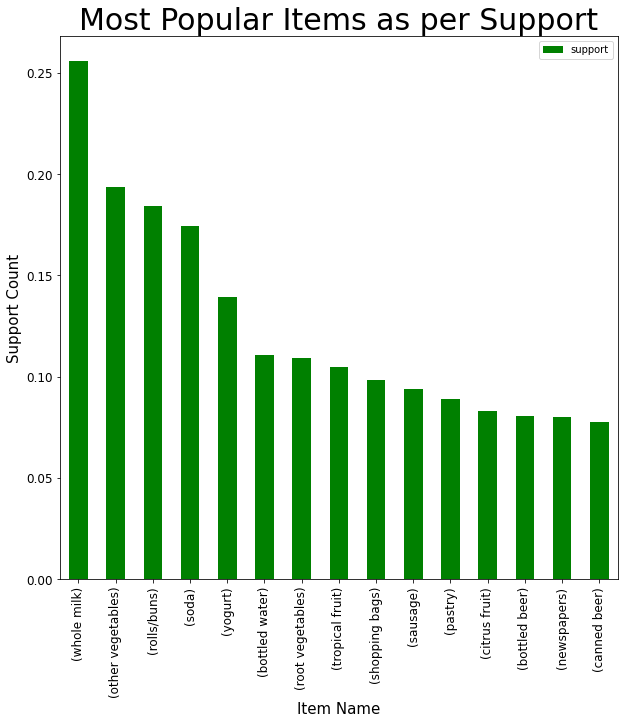

In [8]:
# for i in range (len(most_pop_items.itemsets)):
#     most_pop_items.itemsets.iloc[i]=str(list(most_pop_items.itemsets.iloc[i]))

# Here using a function instead of the above for loop for converting dataframe to list type

most_pop_items.values.tolist()

plt.rcParams['figure.figsize']=(10,10)
most_pop_items.plot.bar('itemsets','support',color='Green')
plt.xlabel('Item Name',fontsize=15)
plt.ylabel('Support Count',fontsize=15)
plt.title('Most Popular Items as per Support',fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

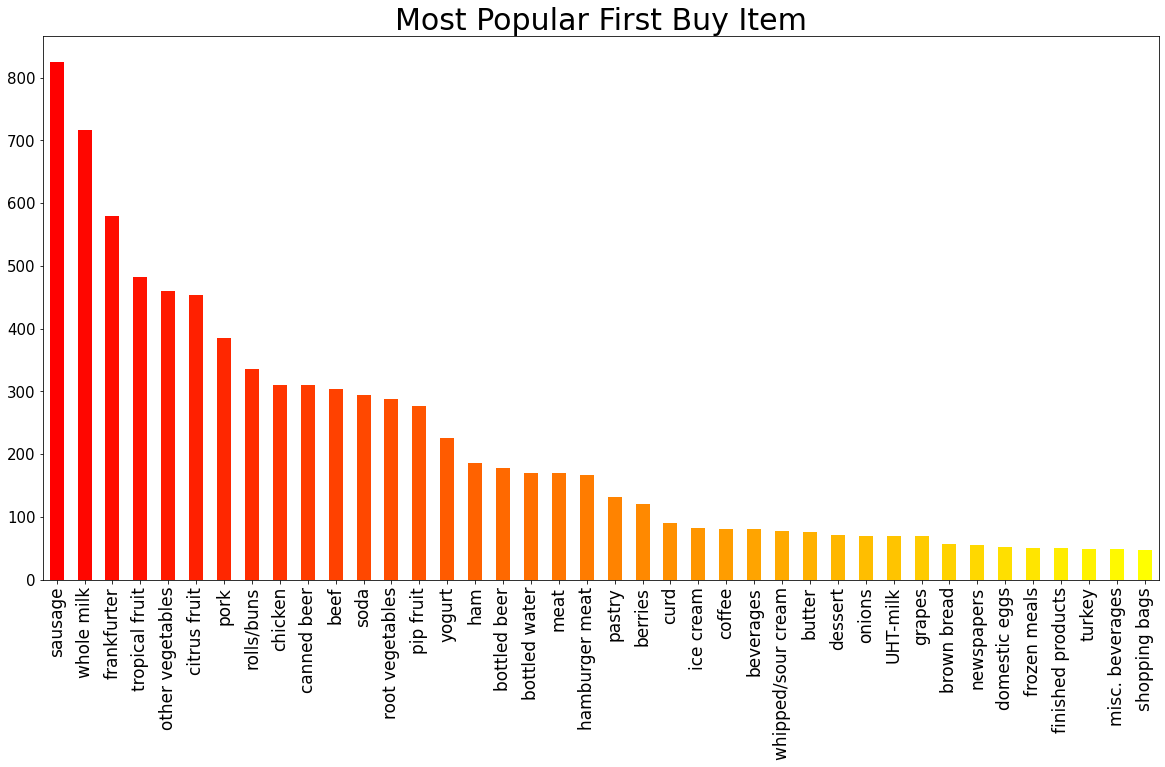

In [9]:
plt.rcParams['figure.figsize'] = (20, 10)
color = plt.cm.autumn(np.linspace(0, 1, 40))
dataset[0].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular First Buy Item', fontsize = 30)
plt.xticks(rotation = 90,fontsize=17 )
plt.yticks(fontsize=15)
plt.show()

In [15]:
association_confi=ar(frequent_items,metric='confidence',min_threshold=0.2)
a_confi_top=association_confi.sort_values('confidence',ascending=False)
a_confi_top.drop(['antecedent support','consequent support'],axis=1).head(10)

,antecedents,consequents,support,confidence,lift,leverage,conviction
887,"(root vegetables, tropical fruit, yogurt)",(whole milk),0.005694,0.700000,2.739554,0.003616,2.481613
842,"(root vegetables, pip fruit, other vegetables)",(whole milk),0.005491,0.675000,2.641713,0.003412,2.290720
375,"(whipped/sour cream, butter)",(whole milk),0.006711,0.660000,2.583008,0.004113,2.189659
726,"(whipped/sour cream, pip fruit)",(whole milk),0.005999,0.648352,2.537421,0.003635,2.117126
377,"(yogurt, butter)",(whole milk),0.009354,0.638889,2.500387,0.005613,2.061648
370,"(root vegetables, butter)",(whole milk),0.008236,0.637795,2.496107,0.004936,2.055423
454,"(tropical fruit, curd)",(whole milk),0.006507,0.633663,2.479936,0.003883,2.032240
828,"(root vegetables, whole milk, citrus fruit)",(other vegetables),0.005796,0.633333,3.273165,0.004025,2.199566
849,"(yogurt, pip fruit, other vegetables)",(whole milk),0.005084,0.625000,2.446031,0.003005,1.985291
475,"(domestic eggs, pip fruit)",(whole milk),0.005389,0.623529,2.440275,0.003181,1.977536


In [11]:
association_supp=ar(frequent_items,metric='support',min_threshold=0.05)
a_supp_top=association_supp.sort_values('support',ascending=False)
a_supp_top.drop(['antecedent support','consequent support'],axis=1).head(10)

,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.074835,0.386758,1.513634,0.025394,1.214013
2,(whole milk),(rolls/buns),0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.056634,0.307905,1.205032,0.009636,1.075696
4,(whole milk),(yogurt),0.056024,0.219260,1.571735,0.020379,1.102157
5,(yogurt),(whole milk),0.056024,0.401603,1.571735,0.020379,1.244132


In [12]:
association_lift=ar(frequent_items,metric='lift',min_threshold=3)
a_lift_top=association_lift.sort_values('lift',ascending=False)
a_lift_top.drop(['antecedent support','consequent support'],axis=1).head(10)

,antecedents,consequents,support,confidence,lift,leverage,conviction
210,"(whole milk, tropical fruit)","(root vegetables, yogurt)",0.005694,0.134615,5.212371,0.004602,1.125712
213,"(root vegetables, yogurt)","(whole milk, tropical fruit)",0.005694,0.220472,5.212371,0.004602,1.228567
214,"(whole milk, yogurt)","(root vegetables, tropical fruit)",0.005694,0.101633,4.828814,0.004515,1.089703
209,"(root vegetables, tropical fruit)","(whole milk, yogurt)",0.005694,0.270531,4.828814,0.004515,1.294059
145,"(whole milk, other vegetables)","(root vegetables, pip fruit)",0.005491,0.073370,4.716272,0.004326,1.062390
142,"(root vegetables, pip fruit)","(whole milk, other vegetables)",0.005491,0.352941,4.716272,0.004326,1.429801
9,(ham),(white bread),0.005084,0.195312,4.639851,0.003988,1.190407
8,(white bread),(ham),0.005084,0.120773,4.639851,0.003988,1.107758
164,"(root vegetables, tropical fruit)","(whole milk, other vegetables)",0.007016,0.333333,4.454257,0.005441,1.387748
169,"(whole milk, other vegetables)","(root vegetables, tropical fruit)",0.007016,0.093750,4.454257,0.005441,1.080224


In [13]:
file = pd.ExcelWriter('Desktop\confidence.xlsx')
a_confi_top.drop(['antecedent support','consequent support','leverage','conviction'],axis=1).head(30).to_excel(file)
# assocn_rules_conf['consequents'].to_excel(file)

file.save()